In [1]:
library(Seurat)
library(WGCNA)
library(cluster)
# library(parallelDist)
library(ggsci)
library(emmeans)
library(lme4)
library(ggbeeswarm)
library(genefilter)
library(tidyverse)
library(reshape2)
library(igraph)
library(gProfileR)
library(ggpubr)
library(here)
library(ggforce)
library(tidygraph)
library(igraph)
library(ggraph)
library(cowplot)
library(future)
library(matrixStats)

Attaching SeuratObject

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Loading required package: Matrix

Loading required package: ggplot2

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ readr::spec()   masks genefilter::spec()
✖ tidyr::unpack() masks Matrix::unpa

In [2]:
install.packages("gProfileR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
base_dir = "/data/projects/robin/cell_free/proteomics_WGCNA/processed/"
data = "lfq.csv"
metadata = "metadata.csv"

wgcna_dir = "/data/projects/robin/cell_free/proteomics_WGCNA/"

In [4]:
obj = paste(base_dir, data, sep="")
vst_mat = read.csv(obj, row.names=1)

In [5]:
# This creates an object called "datExpr" that contains the normalized counts file output from DESeq2
datExpr = vst_mat
# "head" the file to preview it
# head(datExpr) # You see that genes are listed in a column named "X" and samples are in columns

# Manipulate file so it matches the format WGCNA needs 
#row.names(datExpr) = datExpr$X
#datExpr$X = NULL
datExpr = t(datExpr) # now samples are rows and genes are columns

In [6]:
vst_mat <- t(datExpr)

In [7]:
df <- vst_mat

In [8]:
df = t(df)

In [9]:
load(paste(wgcna_dir, "Network_allSamples_signed_nomerge_RLDfiltered.RData", sep=""))

In [10]:
colorh = colnames(MEs) #MEList$validColors

In [11]:
library(dplyr)

In [12]:
chooseTop_n_HubInEachModule <- function(datExpr, colorh, omitColors="grey", 
power=2, type="signed", n){
## This function returns the gene in each module with the highest connectivity.
	
	isIndex = FALSE
	modules = names(table(colorh));
	if(!(is.na(omitColors)[1]))  modules = modules[!is.element(modules,omitColors)]
	if(is.null(colnames(datExpr))){
		colnames(datExpr) = 1:dim(datExpr)[2]
		isIndex = TRUE
	}
	
	hubs = list()
	for (m in modules){
		adj = adjacency(datExpr[,colorh==m],power=power,type=type,)
        
        tmp <- as.data.frame(rowSums(adj))
        colnames(tmp) <- c("sum")
        tmp <- tmp %>% arrange(desc(sum))
        
		hub = rownames(tmp)[1:n]
		hubs[[m]] = hub
	}
	if (isIndex){
		hubs = as.numeric(hubs)
		names(hubs) = modules
	}
	return(hubs)
}


In [13]:
power <- 9

In [14]:
hubs = chooseTop_n_HubInEachModule(df, colorh, type="signed", power=power, n=12)

In [15]:
library(jsonlite)
hubs_json=toJSON(hubs,pretty=TRUE,auto_unbox=TRUE)


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [16]:
write(hubs_json, "../hubs_12.json")

In [17]:
datExpr <- df
# moduleColors <- colnames(MEs) # MEList$validColors

In [18]:
dim(datExpr)

[1]   28 4716

In [44]:
modules<-MEs
c_modules<-data.frame(moduleColors)
row.names(c_modules)<-colnames(datExpr) 
module.list.set1<-substring(colnames(modules),3) 
index.set1<-0
Network=list() 
for (i in 1:length(module.list.set1)){index.set1<-which(c_modules==module.list.set1[i])
Network[[i]]<-row.names(c_modules)[index.set1]}
names(Network)<-module.list.set1
lookup<-function(gene,network){return(network[names(network)[grep(gene,network)]])} 

In [45]:
datExpr <- datExpr[rownames(MEs),]

In [46]:
modulekME = signedKME(datExpr,MEs)

In [22]:
adj= adjacency(datExpr, type = "signed", power = power)

In [23]:
firstup <- function(x) {
  substr(x, 1, 1) <- toupper(substr(x, 1, 1))
  x
}

In [24]:
unique_modules = unique(colnames(modules))

In [28]:
unique_modules

[1] "MEdarkorange"    "MEdarkturquoise" "MEdarkred"       "MElightcyan"    
 [5] "MEroyalblue"     "MEyellow"        "MEdarkgreen"     "MEgrey60"       
 [9] "MEsaddlebrown"   "MEwhite"         "MEmagenta"       "MEdarkgrey"     
[13] "MEturquoise"     "MEbrown"         "MEpurple"        "MEblue"         
[17] "MEblack"         "MEcyan"          "MEgrey"

In [33]:
dim(adj)

[1] 4716 4716

In [34]:
length(unique_modules)

[1] 19

In [50]:
min(c(10,12))

[1] 10

[1] "darkorange"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

 [1] "SERPINB3" "S100A7"   "KRT79"    "S100A7A"  "CALML3"   "S100A8"  
 [7] "LCN2"     "S100A2"   "S100A9"   "LGALS7"   "CALML5"   "WDR13"   
[13] "CSTA"     "SERPINB4" "ARG1"     "CASP14"   "POF1B"    "RNASE7"  
[1] darkorange
Levels: darkorange


Saving 6.67 x 6.67 in image



[1] "darkturquoise"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

 [1] "KRT14" "KRT6B" "KRT6A" "KRT5"  "KRT17" "KRT10" "KRT1"  "KRT78" "DSP"  
[10] "KRT80" "KRT2"  "KRT77" "KRT16" "JUP"   "KRT9"  "DCD"   "PLD3"  "DSG1" 
[19] "PKP1"  "TGM1" 
[1] darkturquoise
Levels: darkturquoise


Saving 6.67 x 6.67 in image



[1] "darkred"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

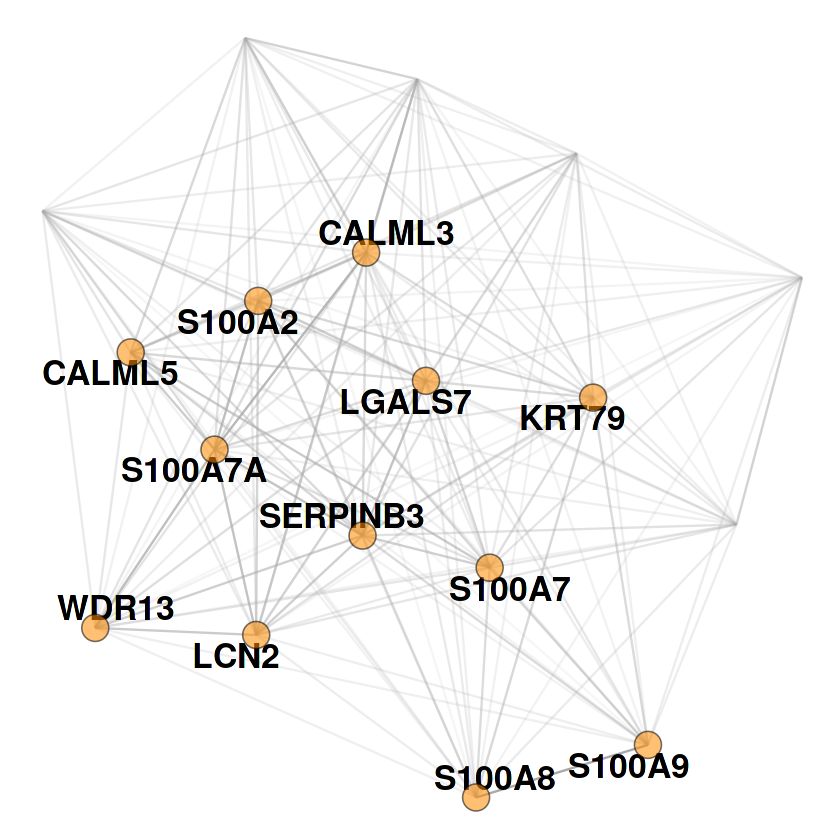

 [1] "ALDOB"    "CFAP74"   "COX20"    "MYL4"     "NLRP1"    "GPNMB"   
 [7] "NPC2"     "G6PD"     "TGM2"     "CRIP1"    "GSTO1"    "PML"     
[13] "PSME2"    "KRT13"    "SERPINB1" "PRSS3"    "FCGR1A"   "ITGB1"   
[19] "KRT19"    "UQCRB"    "PSMD9"    "GUSB"     "KRT18"    "DPP4"    
[25] "CAV1"     "S100A4"   "CALB1"    "ITGA7"    "GLRX"     "CPPED1"  
[31] "PIGR"     "KRT8"     "GYG1"     "LCP1"     "DEFA1"    "KRT4"    
[37] "CREBRF"   "PLEKHA5"  "DMBT1"    "FERMT3"   "CTSC"     "TMOD3"   
[43] "SYT6"     "XP32"     "SERPINB9"
[1] darkred
Levels: darkred


Saving 6.67 x 6.67 in image



[1] "lightcyan"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

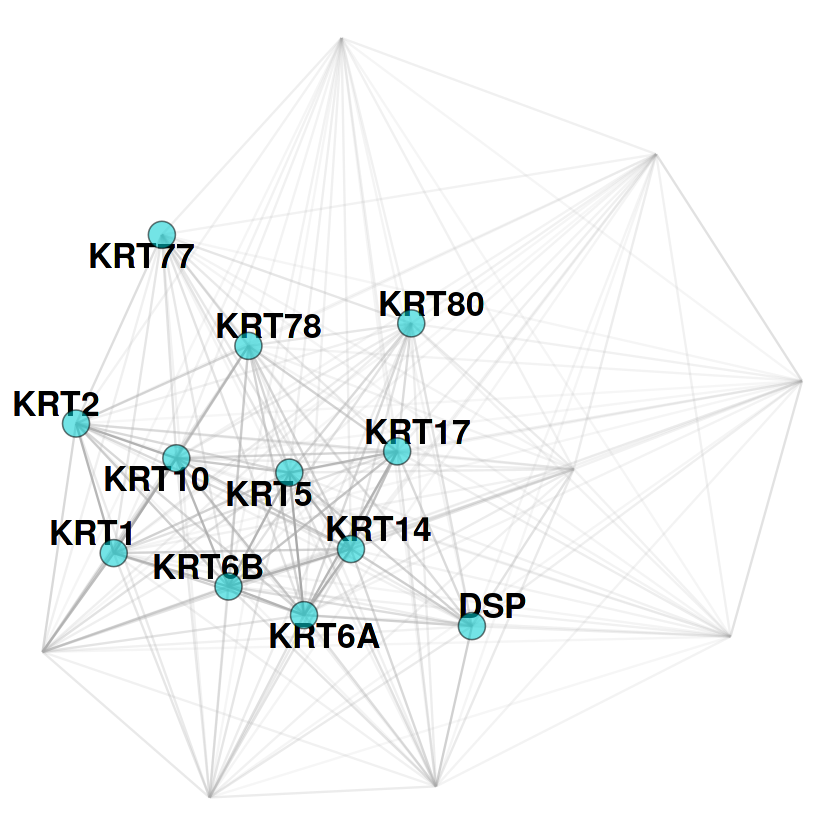

 [1] "ATP5C1"    "ATP5O"     "ATP5L"     "ATP5J"     "VDAC3"     "VDAC1"    
 [7] "ECHS1"     "SLC25A4"   "NNT"       "GOT2"      "ALDH2"     "SLC25A11" 
[13] "FAM162A"   "VDAC2"     "CYCS"      "APOC3"     "ACO2"      "ATP5D"    
[19] "HBG1"      "DCXR"      "ATP5A1"    "C14orf159" "TOMM20"    "MDH2"     
[25] "SDHB"      "SLC25A5"   "NDUFA9"    "ACPP"      "NDUFA11"   "CTSV"     
[1] lightcyan
Levels: lightcyan


Saving 6.67 x 6.67 in image



[1] "royalblue"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

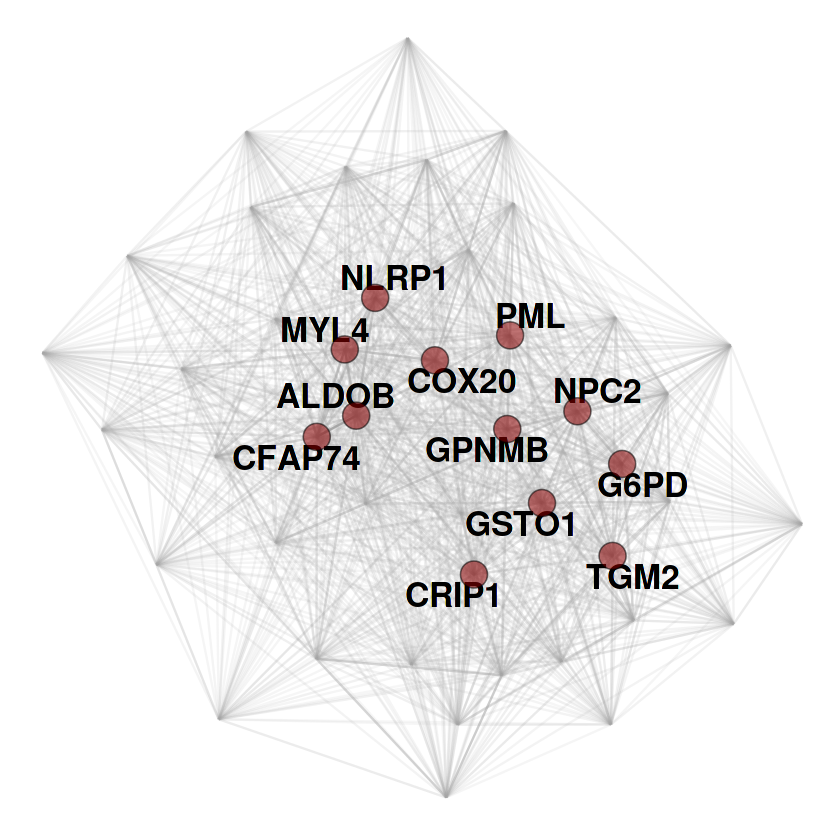

 [1] "RPS9"      "RPL23A"    "RPL13A"    "RPS8"      "HIST2H2BC" "RPS16"    
 [7] "RPL35"     "RPL21"     "RPL6"      "RPL35A"    "RPL18A"    "RPS12"    
[13] "RPL10A"    "RPL17"     "RPL14"     "VBP1"      "DNAJB11"   "TMED7"    
[19] "RCC1"      "SEC13"     "EIF3J"     "MPI"      
[1] royalblue
Levels: royalblue


Saving 6.67 x 6.67 in image



[1] "yellow"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

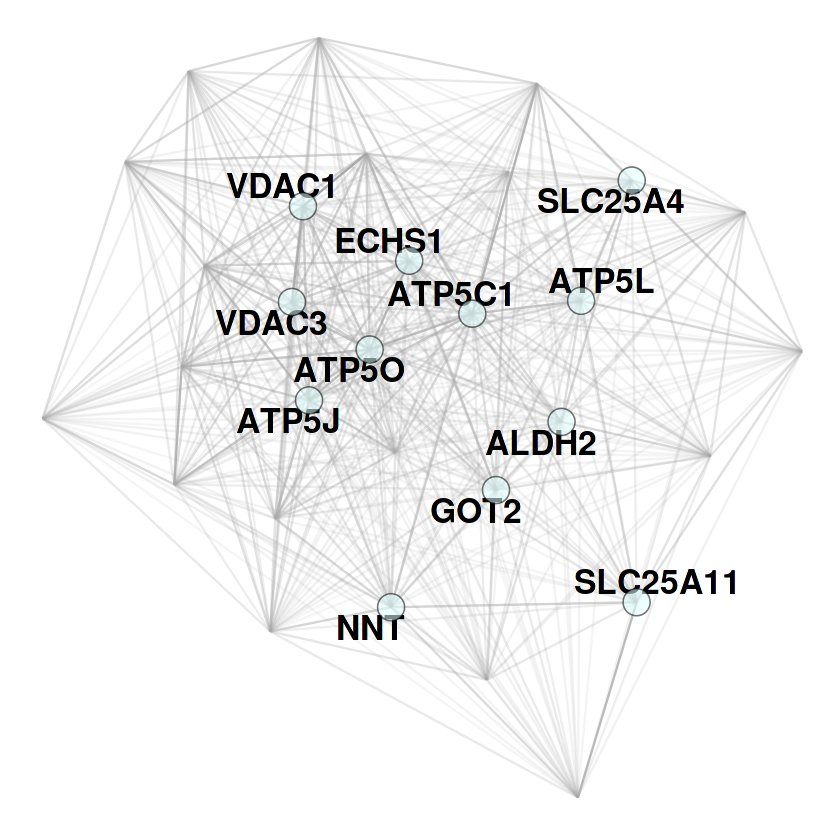

 [1] "ASH1L"    "MGST3"    "TUBAL3"   "HDGFRP3"  "ACTA2"    "AP3D1"   
 [7] "AARS2"    "REXO2"    "MYH6"     "CFL1"     "ASCC3"    "RPS27L"  
[13] "TPD52L2"  "MYL12B"   "CHMP2A"   "EIF5A"    "ARHGEF1"  "DSTN"    
[19] "RAB12"    "IL1R2"    "nan-9"    "PPA2"     "CELF2"    "UBE2V1"  
[25] "STK39"    "TBC1D2"   "GORASP2"  "NDUFS4"   "RCN1"     "TPM1"    
[31] "GRHL2"    "NRK"      "GBAS"     "ATP5I"    "RPLP2"    "SPATA5L1"
[37] "EMR3"     "THTPA"    "TSFM"     "MPO"      "ARPC2"    "SAR1A"   
[43] "ITM2C"    "PDAP1"    "HM13"     "SUOX"     "SAMHD1"   "RPL22"   
[49] "TM9SF4"   "MCRS1"   
[1] yellow
Levels: yellow


Saving 6.67 x 6.67 in image



[1] "darkgreen"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

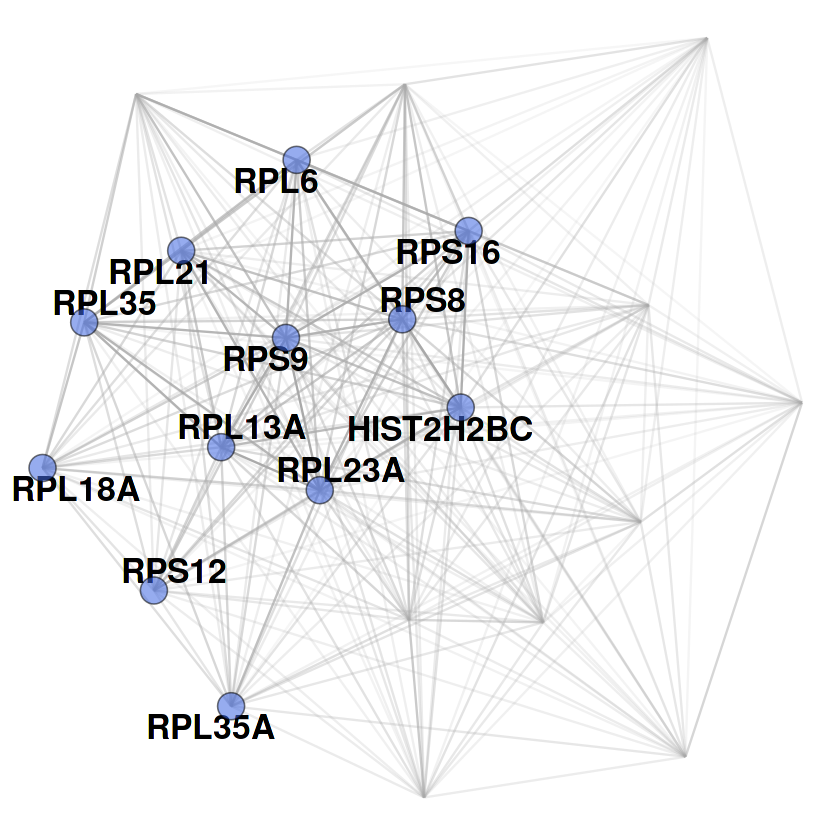

 [1] "HBA1"   "HBD"    "SLC4A1" "CA1"    "BZW1"   "HBB"    "CAT"    "FGG"   
 [9] "SLC2A1" "KIF13A" "FGA"    "FGB"    "SPTA1"  "FN1"    "FBLN1"  "ITGA2B"
[17] "PROS1"  "ZNF268" "NTMT1"  "C4BPA"  "ASNS"  
[1] darkgreen
Levels: darkgreen


Saving 6.67 x 6.67 in image



[1] "grey60"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

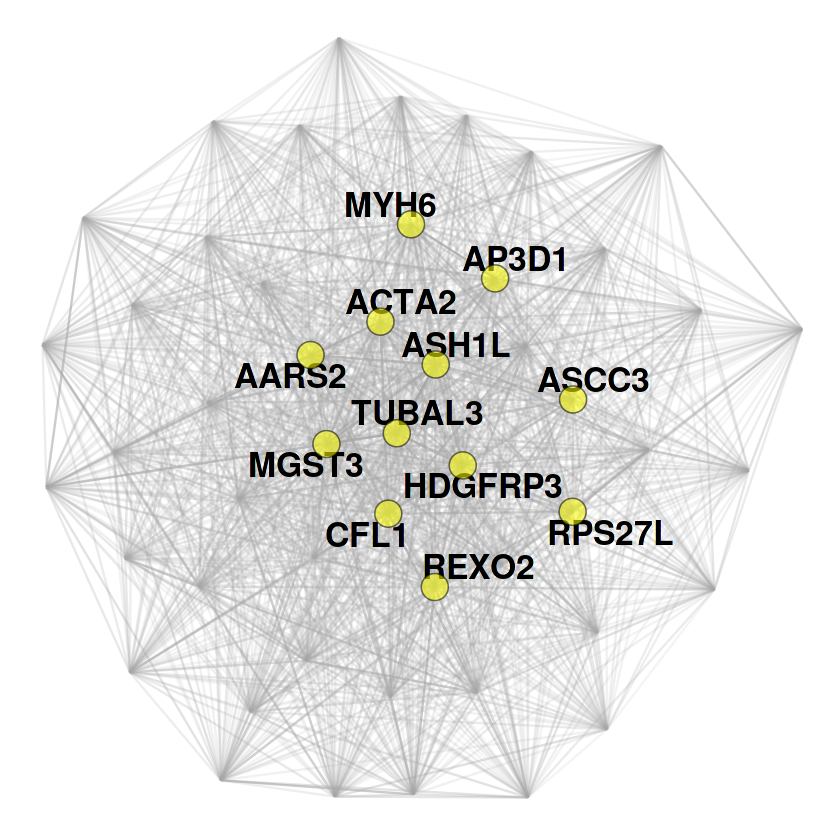

 [1] "NID2"    "LAMC1"   "HSPG2"   "COL4A2"  "LAMA4"   "AGRN"    "NID1"   
 [8] "COL4A1"  "LAMA5"   "LAMB1"   "LAMB2"   "VWA1"    "COL18A1" "CLEC11A"
[15] "IGFBP7"  "VCL"     "TGFBI"   "GGT5"    "LAMA2"   "EMILIN1" "PCOLCE" 
[22] "COL12A1" "BGN"     "PDLIM4"  "CLIC1"   "FHOD1"   "VWF"    
[1] grey60
Levels: grey60


Saving 6.67 x 6.67 in image



[1] "saddlebrown"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

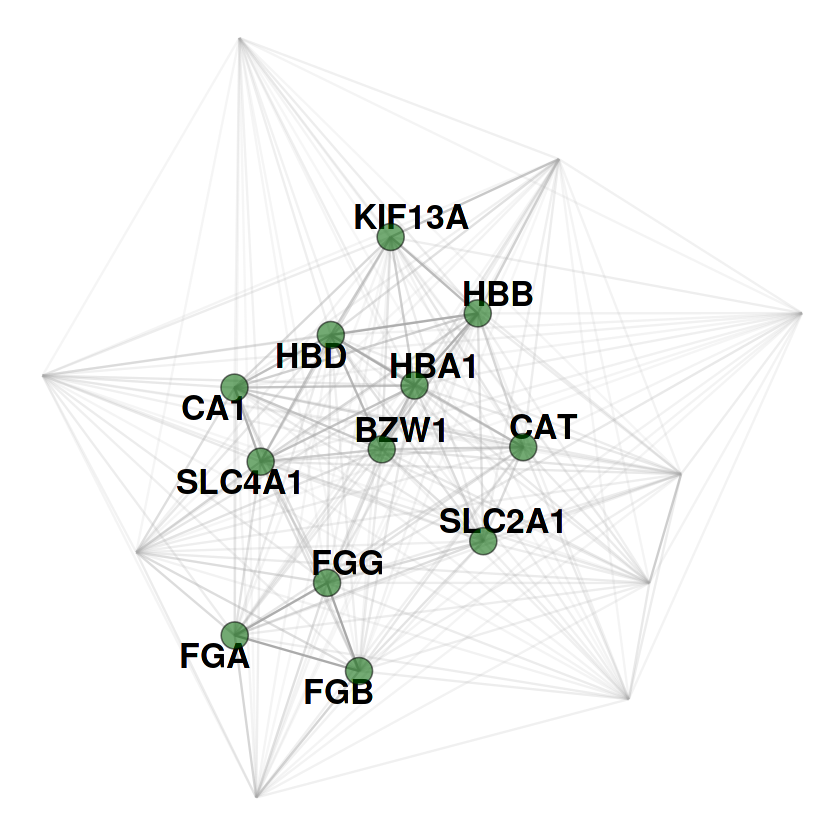

 [1] "NCAPH2"   "CA14"     "DSC3"     "GDE1"     "GAK"      "LRCH3"   
 [7] "RRAS"     "PSMD10"   "B3GAT3"   "RAB3GAP2" "FAM107B" 
[1] saddlebrown
Levels: saddlebrown


Saving 6.67 x 6.67 in image



[1] "white"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

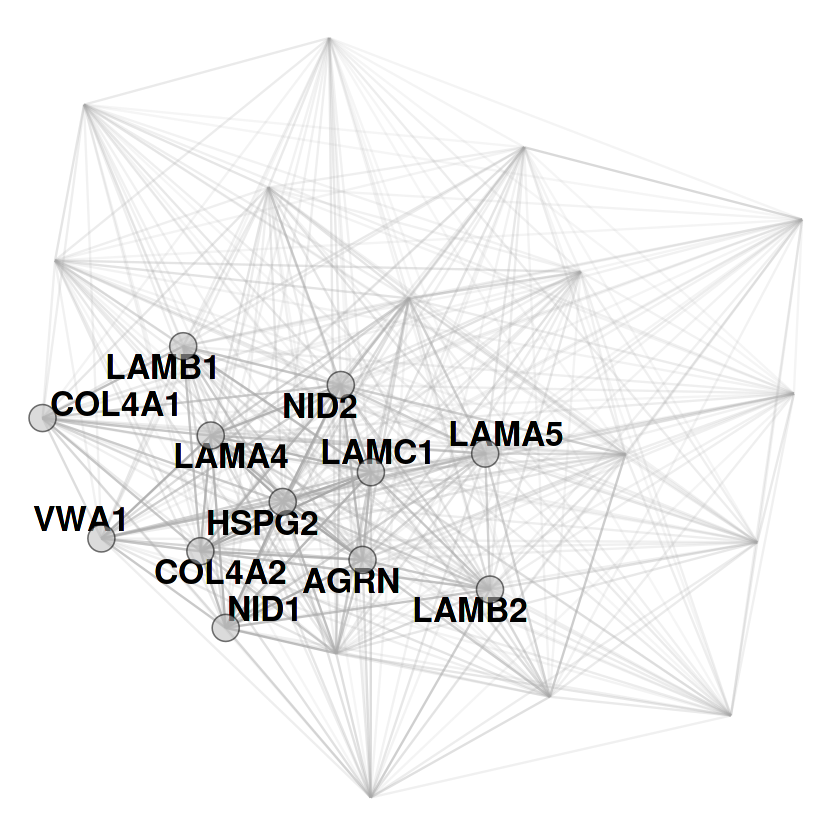

 [1] "VCAN"   "TNC"    "MATN2"  "FCGBP"  "PTPRZ1" "NOS2"   "PTX3"   "PLTP"  
 [9] "NCAN"   "NAMPT"  "CHI3L1" "CTNNA2"
[1] white
Levels: white


Saving 6.67 x 6.67 in image



[1] "magenta"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

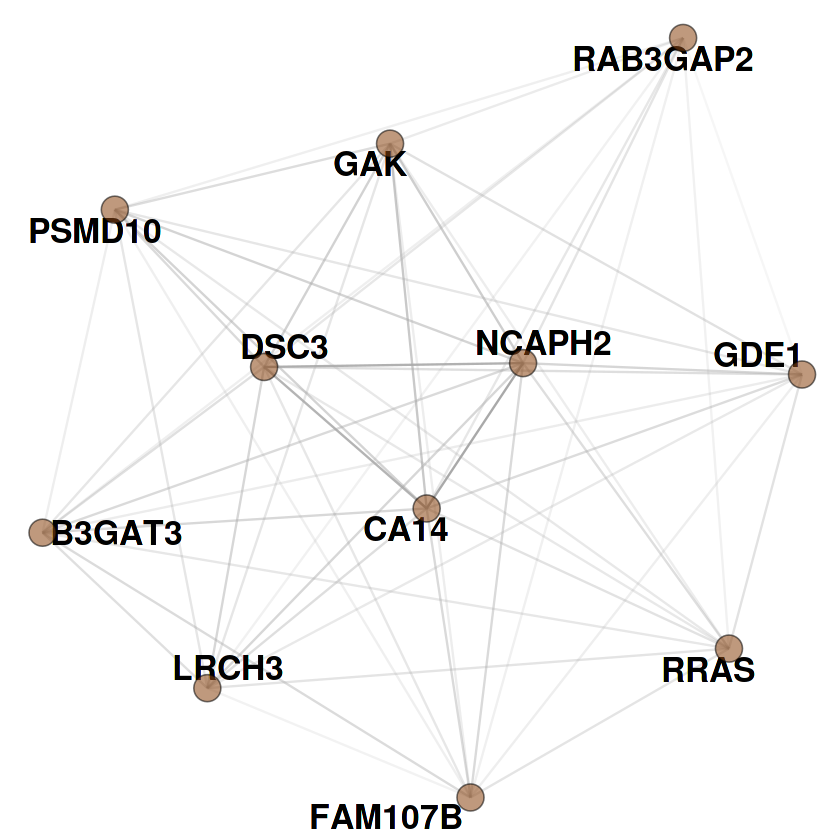

 [1] "nan-1"      "C3"         "IGHV1-69-2" "CP"         "IGHV1-18"  
 [6] "TF"         "IGHG2"      "IGKV3D-7"   "nan-7"      "nan-3"     
[11] "A1BG"       "APOA1"      "GC"         "SERPINF2"   "PLG"       
[16] "HRG"        "IGHG3"      "SERPINA1"   "IGHG4"      "IGKV2-40"  
[21] "KNG1"       "nan-2"      "A2M"        "F2"         "nan-10"    
[26] "AHSG"       "nan-15"     "C9"         "nan-13"     "IGHA1"     
[31] "APOA4"      "SERPINC1"   "AFM"        "ORM2"       "IGKC"      
[36] "PON1"       "IGKV3D-11"  "ALB"        "IGHV3-23"   "SERPING1"  
[41] "ITIH2"      "SERPINA3"   "APOA2"      "TTR"        "ITIH1"     
[46] "HPX"        "CD14"       "C1QC"       "CFH"        "CRYAB"     
[1] magenta
Levels: magenta


Saving 6.67 x 6.67 in image



[1] "darkgrey"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

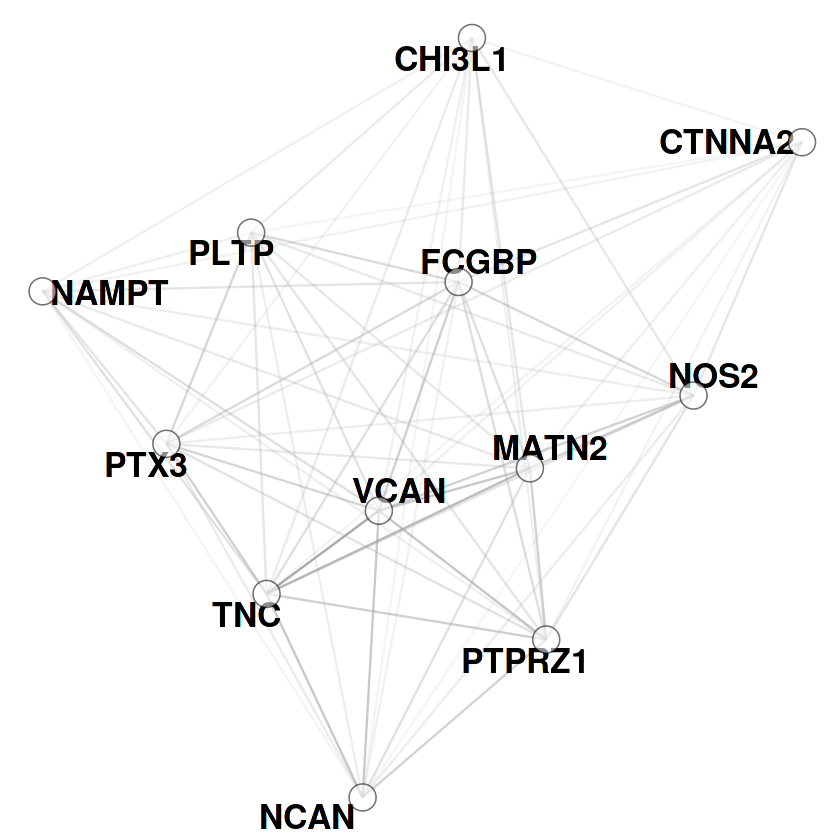

 [1] "FAM120A"  "LRSAM1"   "AIDA"     "DUS3L"    "PIRT"     "AXL"     
 [7] "ROBO1"    "CAMLG"    "CLNS1A"   "KCTD5"    "FAM114A2" "UBL5"    
[13] "ACTN2"    "GFRA2"    "ACSF2"    "NDOR1"    "GPX7"     "PKD2"    
[19] "MRPL18"   "IQCF6"    "EPHA6"    "HOMER1"   "PSMG1"    "CREBBP"  
[25] "TONSL"    "MKL2"     "SIGLEC16" "EIF2B3"   "GFPT2"    "GSPT2"   
[31] "TACO1"    "FAM188A"  "DIDO1"    "GNGT1"    "PDE1A"    "C5orf24" 
[37] "TMEM173"  "SRP68"    "IPO11"    "ADIRF"    "DAAM1"    "RSBN1"   
[43] "MEMO1"    "STON2"    "UBA7"     "PAPLN"    "NME7"     "FAM3C"   
[49] "OSTC"     "KANK2"   
[1] darkgrey
Levels: darkgrey


Saving 6.67 x 6.67 in image



[1] "turquoise"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

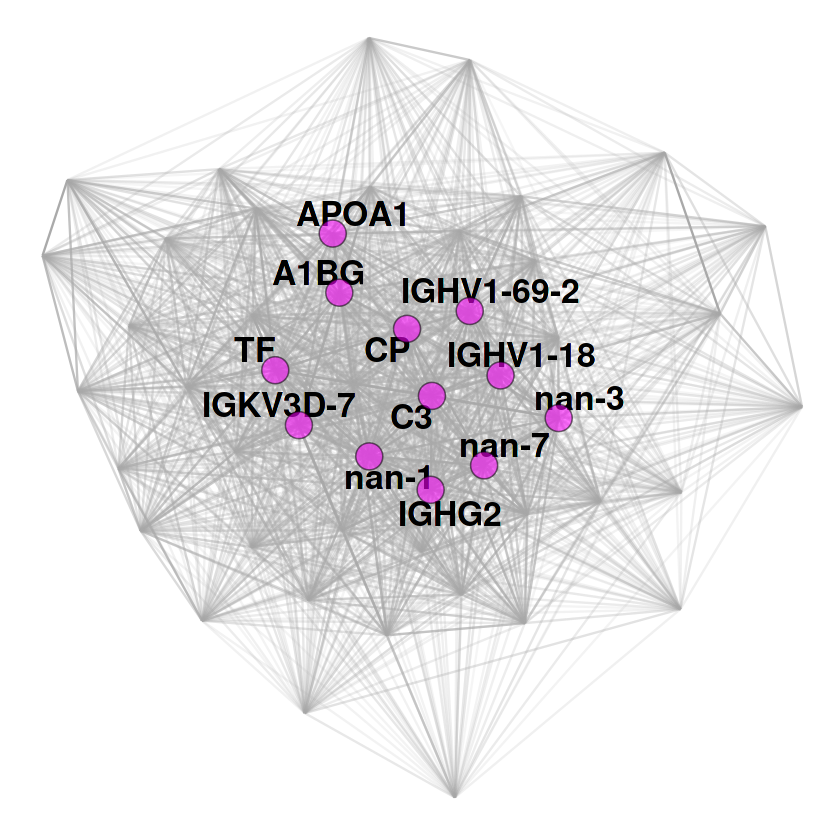

 [1] "FAM114A1" "REEP1"    "C4BPB"    "FGD6"     "MKRN2"    "MARK3"   
 [7] "PEX14"    "COMMD2"   "TCIRG1"   "MAD1L1"   "ZC3H7A"   "EPHX2"   
[13] "EDC3"     "NAT14"    "OAS3"     "CDK2AP2"  "CLN6"     "HAS1"    
[19] "SSBP3"    "USP17L15" "RIF1"     "NKRF"     "SCAF4"    "HSPB2"   
[25] "FAM83H"   "TES"      "B4GAT1"   "ZNF512B"  "LPIN2"    "RPUSD2"  
[31] "FXYD7"    "SPR"      "SMPD4"    "UBE2D1"   "EFEMP2"   "RIPK1"   
[37] "GUCY1A2"  "GPAA1"    "CACNG6"   "PUS7"     "MRPS14"   "TMPO-1"  
[43] "ARHGAP12" "AMFR"     "EHHADH"   "ANAPC2"   "MAPK14"   "RNF25"   
[49] "MOV10"    "OAT"     
[1] turquoise
Levels: turquoise


Saving 6.67 x 6.67 in image



[1] "brown"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

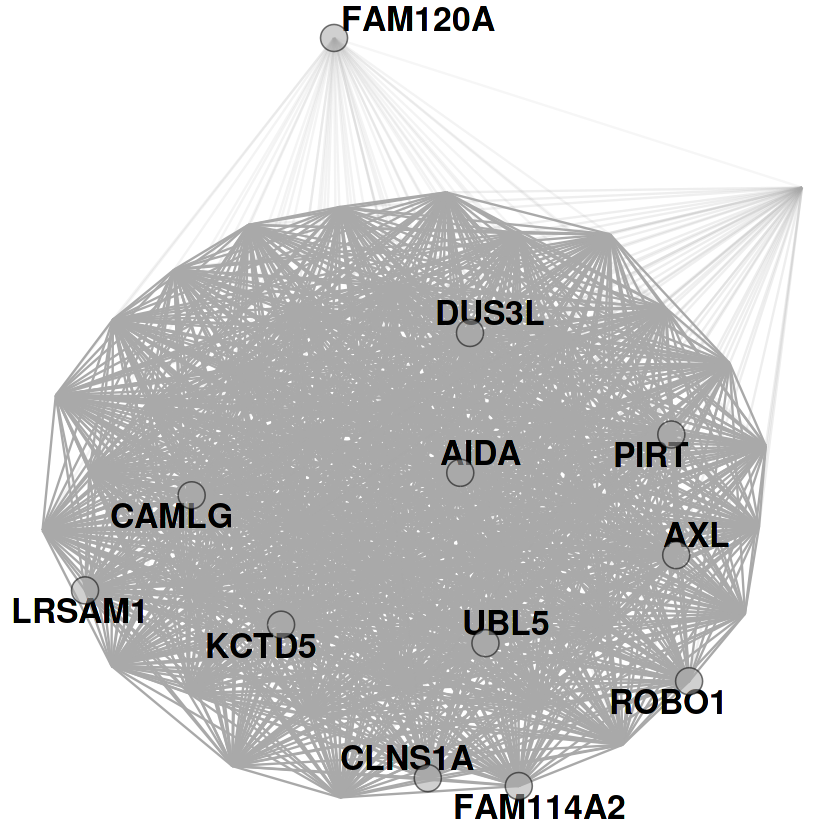

 [1] "PEPD"     "TMSB4X"   "FNTA"     "ETHE1"    "RNPEP"    "HDDC2"   
 [7] "KCTD12"   "CHMP4A"   "CARHSP1"  "NCSTN"    "OSGEP"    "C9orf64" 
[13] "DNPH1"    "DDAH2"    "TPP1"     "HEBP2"    "PSPH"     "PGLS"    
[19] "APEH"     "C9orf142" "ADPRHL2"  "APRT"     "DPP3"     "SH3BGRL" 
[25] "CAPN1"    "PSMB9"    "PSMA5"    "ZNF428"   "PTMA"     "GSS"     
[31] "PSME1"    "DAK"      "PSMB4"    "SERPINB6" "ITPKB"    "SNX2"    
[37] "UNC119B"  "UROD"     "AKR7A2"   "PLS3"     "SHPK"     "BBOX1"   
[43] "PGM1"     "SELH"     "DGKH"     "MAT2A"    "AK3"      "HSPB1"   
[49] "NUDT5"    "MVD"     
[1] brown
Levels: brown


Saving 6.67 x 6.67 in image



[1] "purple"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

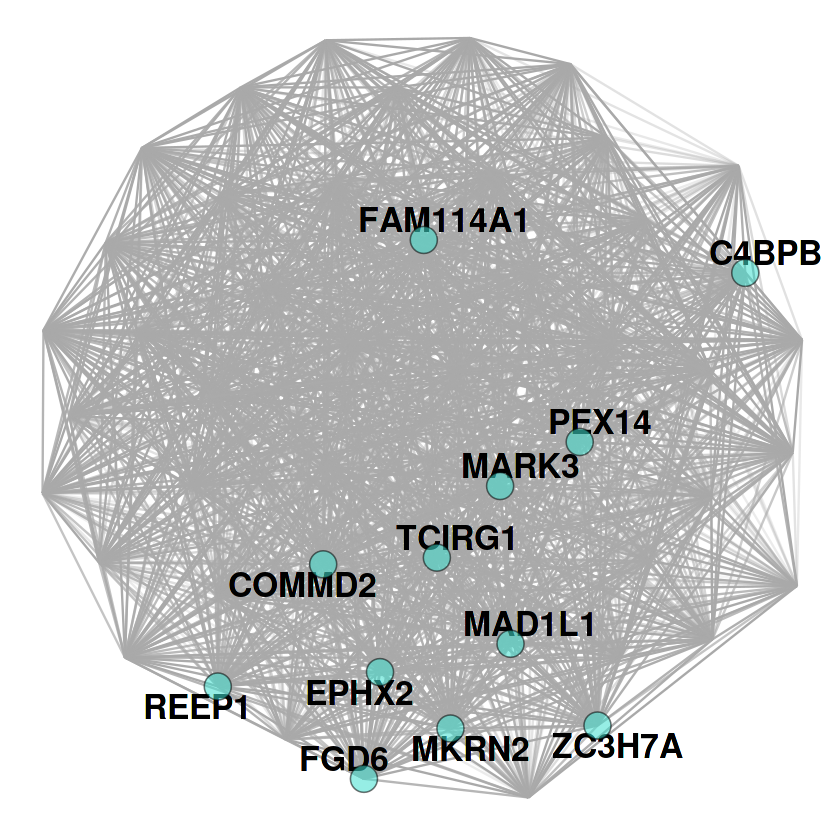

 [1] "CAPNS1"   "EBF2"     "PSAP"     "GAP43"    "CAPG"     "CD44"    
 [7] "CAPN2"    "PNPO"     "MAP1B"    "S100A13"  "SIAE"     "HMGA1"   
[13] "COTL1"    "ENDOD1"   "LAMP1"    "HEXA"     "RAB6A"    "DNASE2"  
[19] "TPPP3"    "ACYP2"    "CTSB"     "GLDC"     "IGF2BP2"  "HEXB"    
[25] "CD58"     "GALC"     "HLA-DRB5" "NPEPPS"   "PYCRL"    "FAH"     
[31] "CA2"      "ASAH1"    "TAGLN2"   "GALT"     "PRKAR2A"  "TP53I3"  
[37] "EFEMP1"   "CAPS"     "CNPY4"    "CTSD"     "ARID1A"   "S100A6"  
[43] "VCP"      "IMPA1"    "MAN2B2"   "TYMP"     "PLXDC2"   "EPDR1"   
[49] "RNASET2"  "GM2A"    
[1] purple
Levels: purple


Saving 6.67 x 6.67 in image



[1] "blue"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

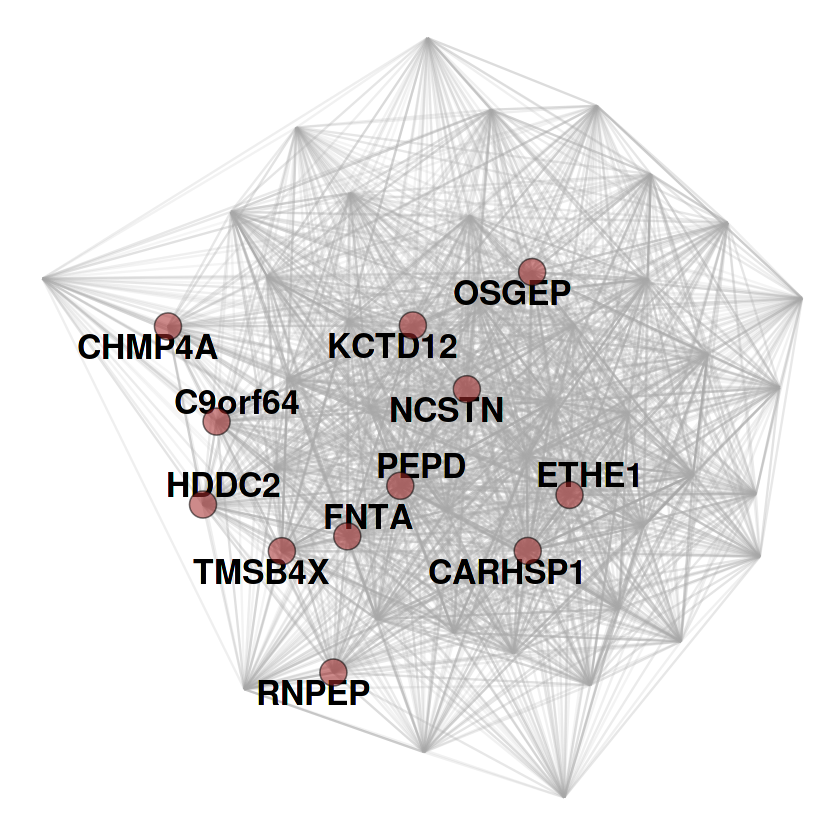

 [1] "ATP1B1"   "RAB3A"    "DNM1"     "SH3GLB2"  "SYT1"     "PRRT2"   
 [7] "SYN1"     "SYN2"     "SYNGR3"   "ATP6V0D1" "SH3GL2"   "ATP6V1A" 
[13] "ATP6V0A1" "SYP"      "ATP6V1E1" "SYN3"     "PCSK1N"   "ATP1A3"  
[19] "GNAO1"    "EPB41L3"  "UCHL1"    "GNG3"     "VSNL1"    "VAMP2"   
[25] "NCDN"     "CRYM"     "SPTBN2"   "KIAA1045" "TAGLN3"   "L1CAM"   
[31] "CDH13"    "INA"      "CAMKV"    "CNP"      "SNCA"     "SYNJ1"   
[37] "CADM3"    "MAP2K1"   "STXBP1"   "ATP6V1D"  "EHD3"     "GLS"     
[43] "PHYHIP"   "WASF1"    "CAMK2B"   "CNTN1"    "GNB1"     "NUMBL"   
[49] "NSF"      "NEFM"    
[1] blue
Levels: blue


Saving 6.67 x 6.67 in image



[1] "black"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

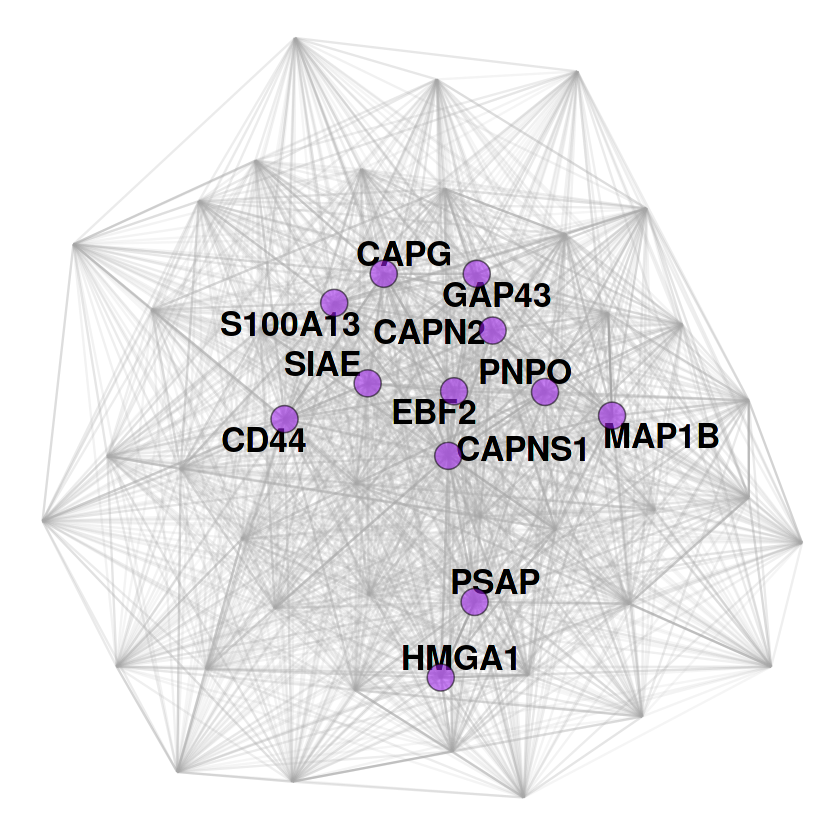

 [1] "CD99"     "ATPIF1"   "GNG5"     "RGS20"    "NT5DC2"   "WFS1"    
 [7] "IGFBP3"   "SRCIN1"   "H1F0"     "DLG1"     "PPP1R2"   "YWHAG"   
[13] "ADNP"     "CD63"     "S100A11"  "C2orf72"  "JAGN1"    "RALB"    
[19] "PDE4DIP"  "NDUFB7"   "FN3KRP"   "GNG12"    "ATXN1"    "VASP"    
[25] "LPHN3"    "ADAM22"   "CDC42BPB" "EVI5L"    "GRN"      "B2M"     
[31] "LUZP1"    "WIZ"      "PDE12"    "PRKCI"    "HLA-B"    "PIP5K1C" 
[37] "AHCYL1"   "SELPLG"   "MT-CO3"   "P4HA2"    "USP39"    "TMEM194A"
[43] "PGGT1B"   "HRNR"     "CRYZL1"   "TCEB1"    "PRKCA"    "NCKIPSD" 
[49] "CCAR1"    "NCAM2"   
[1] black
Levels: black


Saving 6.67 x 6.67 in image



[1] "cyan"


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data fra

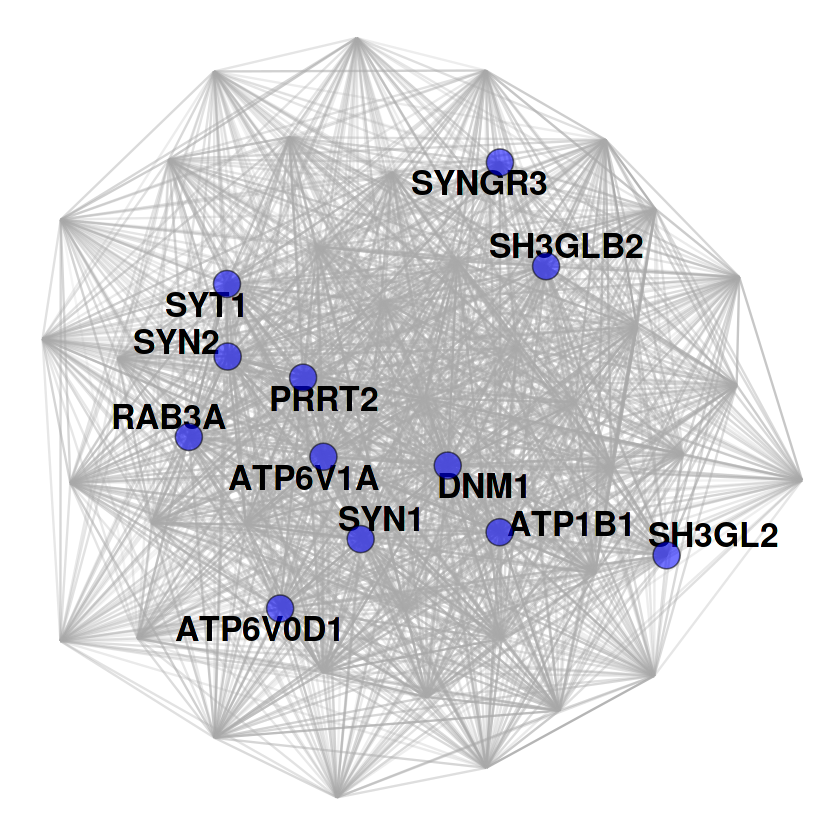

 [1] "DDAH1"    "CADM4"    "GNG7"     "SIRPA"    "LSAMP"    "FMN2"    
 [7] "EPB41L2"  "CADM1"    "LLGL1"    "SLC1A2"   "AQP4"     "OMG"     
[13] "GMPR"     "KBTBD11"  "CARKD"    "PITHD1"   "NUDT3"    "IAH1"    
[19] "MAPK3"    "DNA2"     "FBLN5"    "ABHD14B"  "SLC1A4"   "SH3BGRL3"
[25] "RRAS2"    "ALAD"     "PCBD1"    "CELSR2"   "ALDH9A1"  "NUDT16"  
[31] "GNA13"    "PLCD1"    "ADD3"    
[1] cyan
Levels: cyan


Saving 6.67 x 6.67 in image



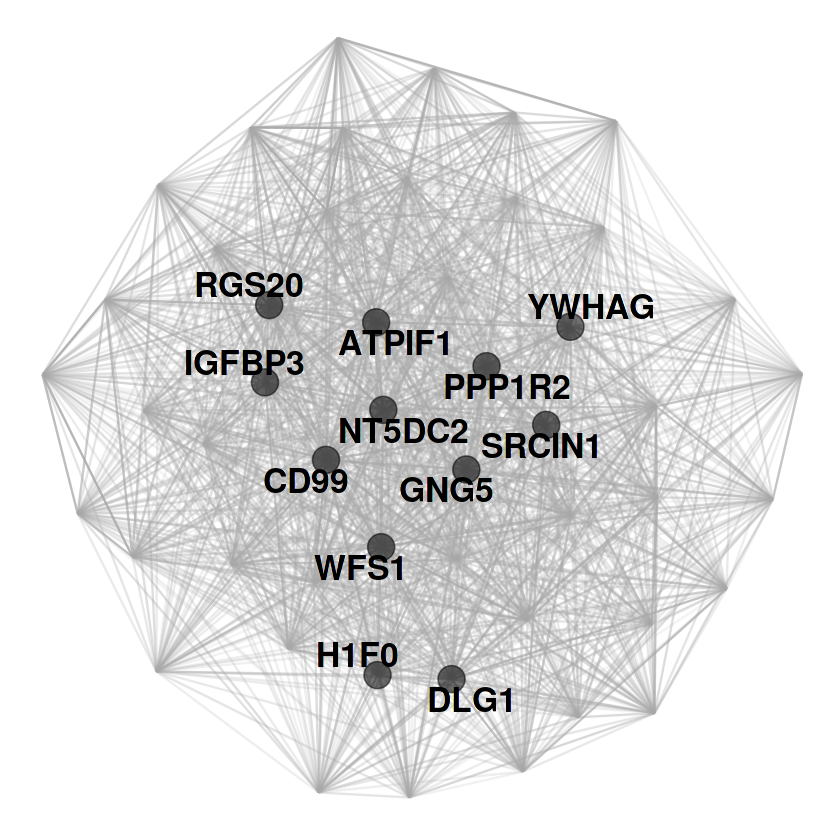

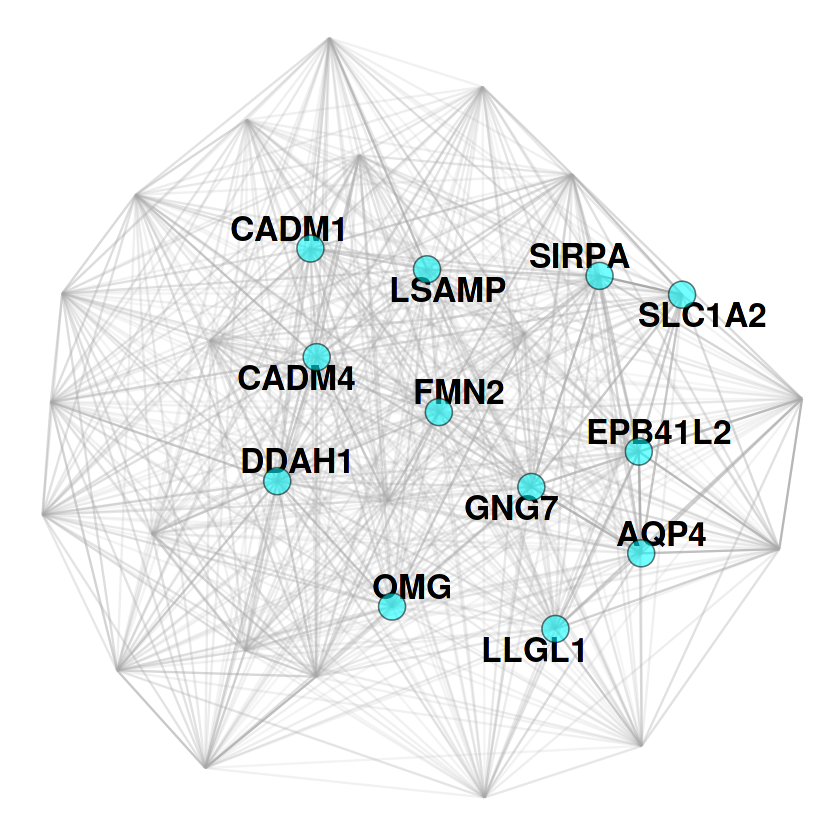

In [51]:
for (color in unique_modules){
    if (color!="MEgrey"){
        color <- c(str_split_fixed(color, "E", 2)[2])
        print(color)
        if (color=="grey60"){
            color1 <- c("grey")
        }
        else {color1 <- color}

       hubgenes <- lapply(seq_len(length(Network)), function(x) {
      dat <- modulekME[Network[[x]], ]
      dat <- dat[order(-dat[paste0("kME", names(Network)[x])]), ]
      gene <- data.frame(gene=rownames(dat),kme=dat[,x]) 
      return(gene)
}
)

names(hubgenes)<- names(Network)

# color <- c("black")
lapply(color, function(col) {
  # print(dim(hubgenes[[col]])[1])
  maxsize <- min(dim(hubgenes[[col]])[1], 50)
  hubs <- data.frame(genes=hubgenes[[col]]$gene[1:maxsize], 
                     kme = hubgenes[[col]]$kme[1:maxsize], mod = rep(col,maxsize))
}) -> hub_plot 


hub_plot <- lapply(hub_plot, function(x) {
  print(x$genes)
  adj[as.character(x$genes), as.character(x$genes)] %>% 
  graph.adjacency(mode = "undirected", weighted = T, diag = FALSE) %>%
  as_tbl_graph(g1) %>% upgrade_graph() %>% activate(nodes) %>%
    dplyr::mutate(mod=x$mod) %>%
    dplyr::mutate(kme=x$kme)  %>% 
    activate(edges) %>% dplyr::filter(weight>0)}
)

names <- hubgenes[[color[1]]][, "gene"][1:12]

hub_plot <- lapply(hub_plot, function(x) {
  x  %>% 
    activate(nodes) %>% 
    dplyr::mutate(color = ifelse(name %in% names, yes=color, no=NA))
})



set.seed("139")
plotlist <- lapply(hub_plot,  function(x) {
  print(as.factor(color))
  print(ggraph(x,  layout = 'fr') + 
  geom_edge_link(color="darkgrey", aes(alpha = weight), show.legend = F)  + 
  scale_edge_width(range = c(0.2, 1)) + geom_node_text(aes(filter=name %in% names, label=name, 
                                                           colour=NULL), 
                                                       fontface="bold", size=7, repel = T) +
  geom_node_point(aes(filter=name %in% names, size=7, alpha=0.5), fill=color1[1], shape=21, size=7,
                 color = "black") +
  theme_graph() + theme(legend.position = "none", plot.title = element_text(hjust=0.5,
                                                                           size=30), 
                        plot.margin = unit(c(0, 0, 0, 0), "cm")) + coord_cartesian(clip = "off")) + 
    ggtitle(firstup(color))
})
    ggsave(paste("../results_figures/graph", color[1], ".png", sep=""), plotlist[[1]], dpi=100, device="png")
}
}

In [52]:
eigen_genes <- MEs

In [53]:
write.csv(eigen_genes, "../eigen_genes.csv")